Polynomial Least Squares Interpolation

Results for Polynomial Interpolation:
P(3.0) = 39.738310196528914
|P(3.0) - f(3.0)| = 0.7383101965289143
Sum of errors at nodes: 1.4856027519272175e-10


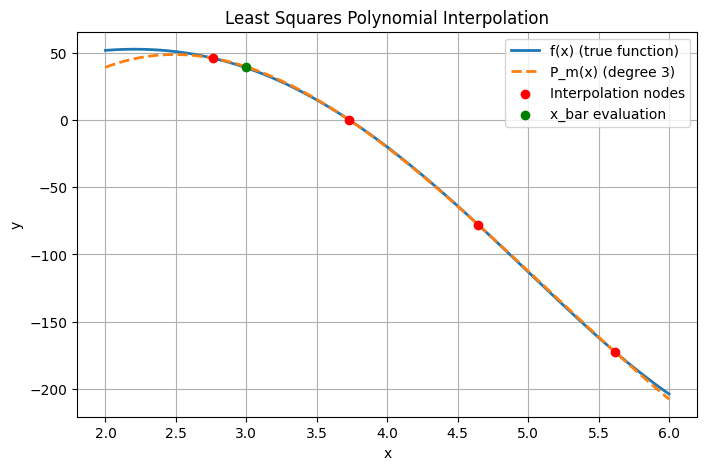


Trigonometric Interpolation

Results for Trigonometric Interpolation:
T_n(4.0) = -3.04625730456614
|T_n(4.0) - f(4.0)| = 4.122667014614086


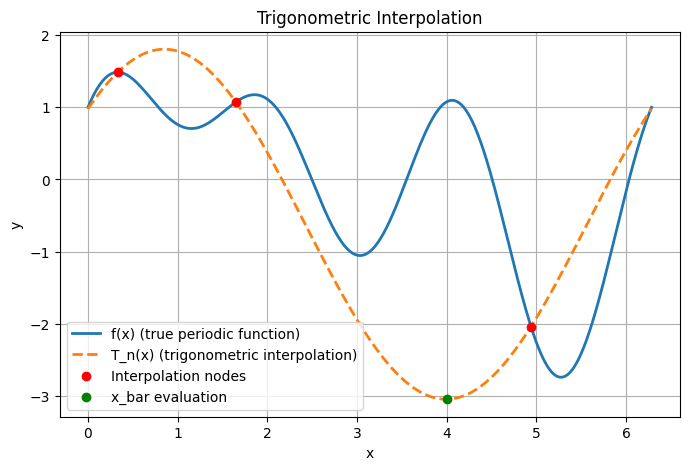

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Define the functions f to be approximated.
# For the polynomial least squares part, we use:
def f_poly(x):
    # Example function: f(x) = x^4 - 12*x^3 + 30*x^2 + 12
    return x**4 - 12*x**3 + 30*x**2 + 12

# For the trigonometric interpolation, we assume a periodic function.
# Here we choose:
def f_trig(x):
    # Example periodic function with period 2*pi: f(x) = sin(x) - cos(x)
    return np.sin(2*x) + np.sin(x) + np.cos(3*x)

# -------------------------
# Horner's method for evaluating a polynomial.
# Here coeffs are assumed to be in increasing order (a0, a1, ..., a_m)
# and we evaluate P(x) = a0 + a1*x + ... + a_m*x^m.
def horner_eval(coeffs, v):
    result = coeffs[-1]
    for a in coeffs[-2::-1]:
        result = result * v + a
    return result

# -------------------------
# Least squares polynomial fitting.
# Given points (x, y) and desired polynomial degree m, solve the normal equations.
def least_squares_poly(x, y, m):
    N = len(x)
    # Build the (m+1)x(m+1) matrix A and right-hand side vector b.
    A = np.zeros((m+1, m+1))
    b = np.zeros(m+1)
    for i in range(m+1):
        for j in range(m+1):
            A[i, j] = np.sum(x**(i+j))
        b[i] = np.sum(y * (x**i))
    coeffs = np.linalg.solve(A, b)  # coeffs: [a0, a1, ..., a_m]
    return coeffs

# -------------------------
# Trigonometric interpolation.
# For an odd number of nodes (n+1 = 2*m + 1) in [0, 2π), we want to find coefficients X
# for T_n(x) = a0 + sum_{k=1}^m [a_k*cos(kx) + b_k*sin(kx)].
# We set up the system with the following basis functions:
#   ε0(x)=1, ε_{2k-1}(x)=sin(kx), ε_{2k}(x)=cos(kx),  k=1,..., m.
# The unknown vector X is arranged as:
#   X = [a0, b1, a1, b2, a2, ..., b_m, a_m]
def trig_interp(x, y, m):
    N = 2 * m + 1  # number of nodes
    T = np.zeros((N, 2 * m + 1))
    for i in range(N):
        xi = x[i]
        T[i, 0] = 1.0  # ε0(x) = 1
        for k in range(1, m + 1):
            T[i, 2 * k - 1] = np.sin(k * xi)  # coefficient for b_k
            T[i, 2 * k] = np.cos(k * xi)      # coefficient for a_k
    X = np.linalg.solve(T, y)  # X = [a0, b1, a1, b2, a2, ..., b_m, a_m]
    return X

# Evaluate the trigonometric interpolation polynomial at a given point x_bar.
def eval_trig(X, m, x_bar):
    result = X[0]  # a0
    for k in range(1, m + 1):
        b_k = X[2 * k - 1]
        a_k = X[2 * k]
        result += a_k * np.cos(k * x_bar) + b_k * np.sin(k * x_bar)
    return result

# -------------------------
# Main function to run both interpolation tasks.
def main():
    # -------------------------
    # PART 1: Polynomial Least Squares Interpolation with Horner's Method
    print("Polynomial Least Squares Interpolation")
    # Input interval and number of nodes:
    x0 = float(input("Enter x0 (left endpoint) for polynomial interpolation: "))
    xn = float(input("Enter xn (right endpoint) for polynomial interpolation: "))
    N = int(input("Enter number of interpolation points (n+1): "))
    if N < 2:
        raise ValueError("Need at least 2 points!")
    # Degree m (should be less than N; problem suggests m < 6 sometimes)
    m_poly = int(input("Enter the polynomial degree m (should be < number of points): "))
    if m_poly >= N:
        raise ValueError("Degree m must be less than the number of points")

    # Generate N random points in [x0, xn] and sort them.
    x_poly = np.sort(np.random.uniform(x0, xn, N))
    y_poly = f_poly(x_poly)

    # Ask for the evaluation point x_bar (should not be one of the nodes)
    x_bar_poly = float(input("Enter the value x_bar (not one of the interpolation nodes) for evaluation: "))

    # Compute least squares polynomial coefficients.
    coeffs_poly = least_squares_poly(x_poly, y_poly, m_poly)
    # Evaluate the polynomial at x_bar using Horner's method.
    P_x_bar = horner_eval(coeffs_poly, x_bar_poly)

    # Compute error at x_bar and cumulative error at nodes.
    error_at_x_bar = abs(P_x_bar - f_poly(x_bar_poly))
    cumulative_error = np.sum(np.abs([horner_eval(coeffs_poly, xi) - yi for xi, yi in zip(x_poly, y_poly)]))

    print("\nResults for Polynomial Interpolation:")
    print(f"P({x_bar_poly}) = {P_x_bar}")
    print(f"|P({x_bar_poly}) - f({x_bar_poly})| = {error_at_x_bar}")
    print(f"Sum of errors at nodes: {cumulative_error}")

    # Bonus: Plot the original function and the least squares polynomial.
    x_dense = np.linspace(x0, xn, 400)
    y_true = f_poly(x_dense)
    # Evaluate the polynomial on the dense grid using Horner’s method.
    y_poly_fit = np.array([horner_eval(coeffs_poly, x_val) for x_val in x_dense])

    plt.figure(figsize=(8, 5))
    plt.plot(x_dense, y_true, label="f(x) (true function)", lw=2)
    plt.plot(x_dense, y_poly_fit, label=f"P_m(x) (degree {m_poly})", lw=2, linestyle="--")
    plt.scatter(x_poly, y_poly, color="red", zorder=5, label="Interpolation nodes")
    plt.scatter([x_bar_poly], [P_x_bar], color="green", zorder=5, label="x_bar evaluation")
    plt.title("Least Squares Polynomial Interpolation")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

    # -------------------------
    # PART 2: Trigonometric Interpolation
    print("\nTrigonometric Interpolation")
    # For trigonometric interpolation we assume the function is periodic with period 2π.
    # Let m_trig define the degree; then number of nodes is 2*m_trig + 1.
    m_trig = int(input("Enter the value m for trigonometric interpolation (number of nodes = 2*m + 1): "))
    N_trig = 2 * m_trig + 1

    # Generate N_trig random nodes in [0, 2π) and sort them.
    x_trig = np.sort(np.random.uniform(0, 2*np.pi, N_trig))
    y_trig = f_trig(x_trig)

    # Ask for the evaluation point for trigonometric interpolation.
    x_bar_trig = float(input("Enter the evaluation value x_bar for trigonometric interpolation (in [0, 2π]): "))

    # Compute the trigonometric interpolation coefficients.
    coeffs_trig = trig_interp(x_trig, y_trig, m_trig)
    # Evaluate the trigonometric polynomial at x_bar.
    T_x_bar = eval_trig(coeffs_trig, m_trig, x_bar_trig)

    error_trig = abs(T_x_bar - f_trig(x_bar_trig))

    print("\nResults for Trigonometric Interpolation:")
    print(f"T_n({x_bar_trig}) = {T_x_bar}")
    print(f"|T_n({x_bar_trig}) - f({x_bar_trig})| = {error_trig}")

    # Bonus: Plot the original periodic function and its trigonometric interpolation.
    x_dense_trig = np.linspace(0, 2*np.pi, 400)
    y_trig_true = f_trig(x_dense_trig)
    y_trig_fit = np.array([eval_trig(coeffs_trig, m_trig, x_val) for x_val in x_dense_trig])

    plt.figure(figsize=(8, 5))
    plt.plot(x_dense_trig, y_trig_true, label="f(x) (true periodic function)", lw=2)
    plt.plot(x_dense_trig, y_trig_fit, label="T_n(x) (trigonometric interpolation)", lw=2, linestyle="--")
    plt.scatter(x_trig, y_trig, color="red", zorder=5, label="Interpolation nodes")
    plt.scatter([x_bar_trig], [T_x_bar], color="green", zorder=5, label="x_bar evaluation")
    plt.title("Trigonometric Interpolation")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()